# Analysing  a Client's portfolio and giving recommendations

## The Case

The year is 2019.<br><br>An Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI), has a new client named Mary Johnson, 65 years old.<br> Mary recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next step, the firm has asked me to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

## The Analysis 

### Identifying the five stocks and getting the respective Stock Tickers

The __five largest stocks__ in the __Sector "Health Care"__ in terms of __Market Capitalization__:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.3f}'.format

In [2]:
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services


In [3]:
health = listings.loc[listings.Sector == "Health Care"].copy()

In [4]:
large_cap_hea = health.nlargest(n = 5, columns = "Market_Cap")
large_cap_hea

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


Here, I am extracting the 5 stocks tickers according to the highest market caps.

In [5]:
ticker = large_cap_hea.index.to_list()
ticker

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

### Creating an appropriate Index from 1997 until the end of 2018 that best reflects her strategy, and<br> Normalising the Price Chart

I will first download and import historical prices from Yahoo Finance. Then I will create a __Price-weighted Total Return Index__.

In [6]:
start = "1997-01-01"
end = "2018-12-31"

In [7]:
stocks = yf.download(ticker, start= start, end = end )[["Adj Close", "Close"]]

[*********************100%***********************]  5 of 5 completed


In [8]:
stocks.head()

Adj Close                            Close                       \
                 JNJ    MRK    NVS   PFE   UNH    JNJ    MRK    NVS    PFE   
Date                                                                         
1996-12-31    13.489 15.706 13.068 5.942 4.631 24.875 37.989 25.762 13.125   
1997-01-02    13.489 15.756 12.983 5.862 4.656 24.875 38.108 25.594 12.947   
1997-01-03    13.625 16.298 12.897 5.987 4.785 25.125 39.420 25.426 13.223   
1997-01-06    13.727 16.348 12.869 5.960 4.798 25.312 39.540 25.370 13.164   
1997-01-07    13.760 16.372 12.897 6.050 4.811 25.375 39.599 25.426 13.362   

                  
             UNH  
Date              
1996-12-31 5.625  
1997-01-02 5.656  
1997-01-03 5.812  
1997-01-06 5.828  
1997-01-07 5.844

In [9]:
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index")
weights.head()

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1996-12-31,0.232,0.354,0.240,0.122,0.052
1997-01-02,0.232,0.356,0.239,0.121,0.053
1997-01-03,0.230,0.362,0.233,0.121,0.053
1997-01-06,0.232,0.362,0.232,0.121,0.053
1997-01-07,0.232,0.361,0.232,0.122,0.053


In [10]:
ret = stocks["Adj Close"].pct_change().dropna()

Creating the index from the Top 5 Health Care stocks:

In [11]:
hea_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)
hea_index[pd.to_datetime("1996-12-31")] = 100
hea_index.sort_index(inplace = True)
hea_index.name = "Health Care"
hea_index.head()

Date
1996-12-31   100.000
1997-01-02    99.818
1997-01-03   101.520
1997-01-06   101.712
1997-01-07   102.077
Name: Health Care, dtype: float64

In [12]:
hea_index.iplot(xTitle="Years", title = "Health Care Index")

That looks really terrific! Her initial Investment increased eightfold in 22 Years.  

### Creating a Return Triangle (using Log Returns)

In [13]:
annual = hea_index.resample("A", kind = "period").last().to_frame()
annual.columns = ["Price"]
annual.head()

,Price
Date,
1996,100.000
1997,141.073
1998,191.277
1999,173.802
2000,235.002


In [14]:
annual["Return"] = np.log(annual.Price / annual.Price.shift())

In [15]:
annual.dropna(inplace = True)

In [16]:
annual.head()

,Price,Return
Date,,
1997,141.073,0.344
1998,191.277,0.304
1999,173.802,-0.096
2000,235.002,0.302
2001,201.144,-0.156


In [17]:
years = annual.index.size
years

22

In [18]:
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [19]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [20]:
triangle = annual.drop(columns = ["Price", "Return"])

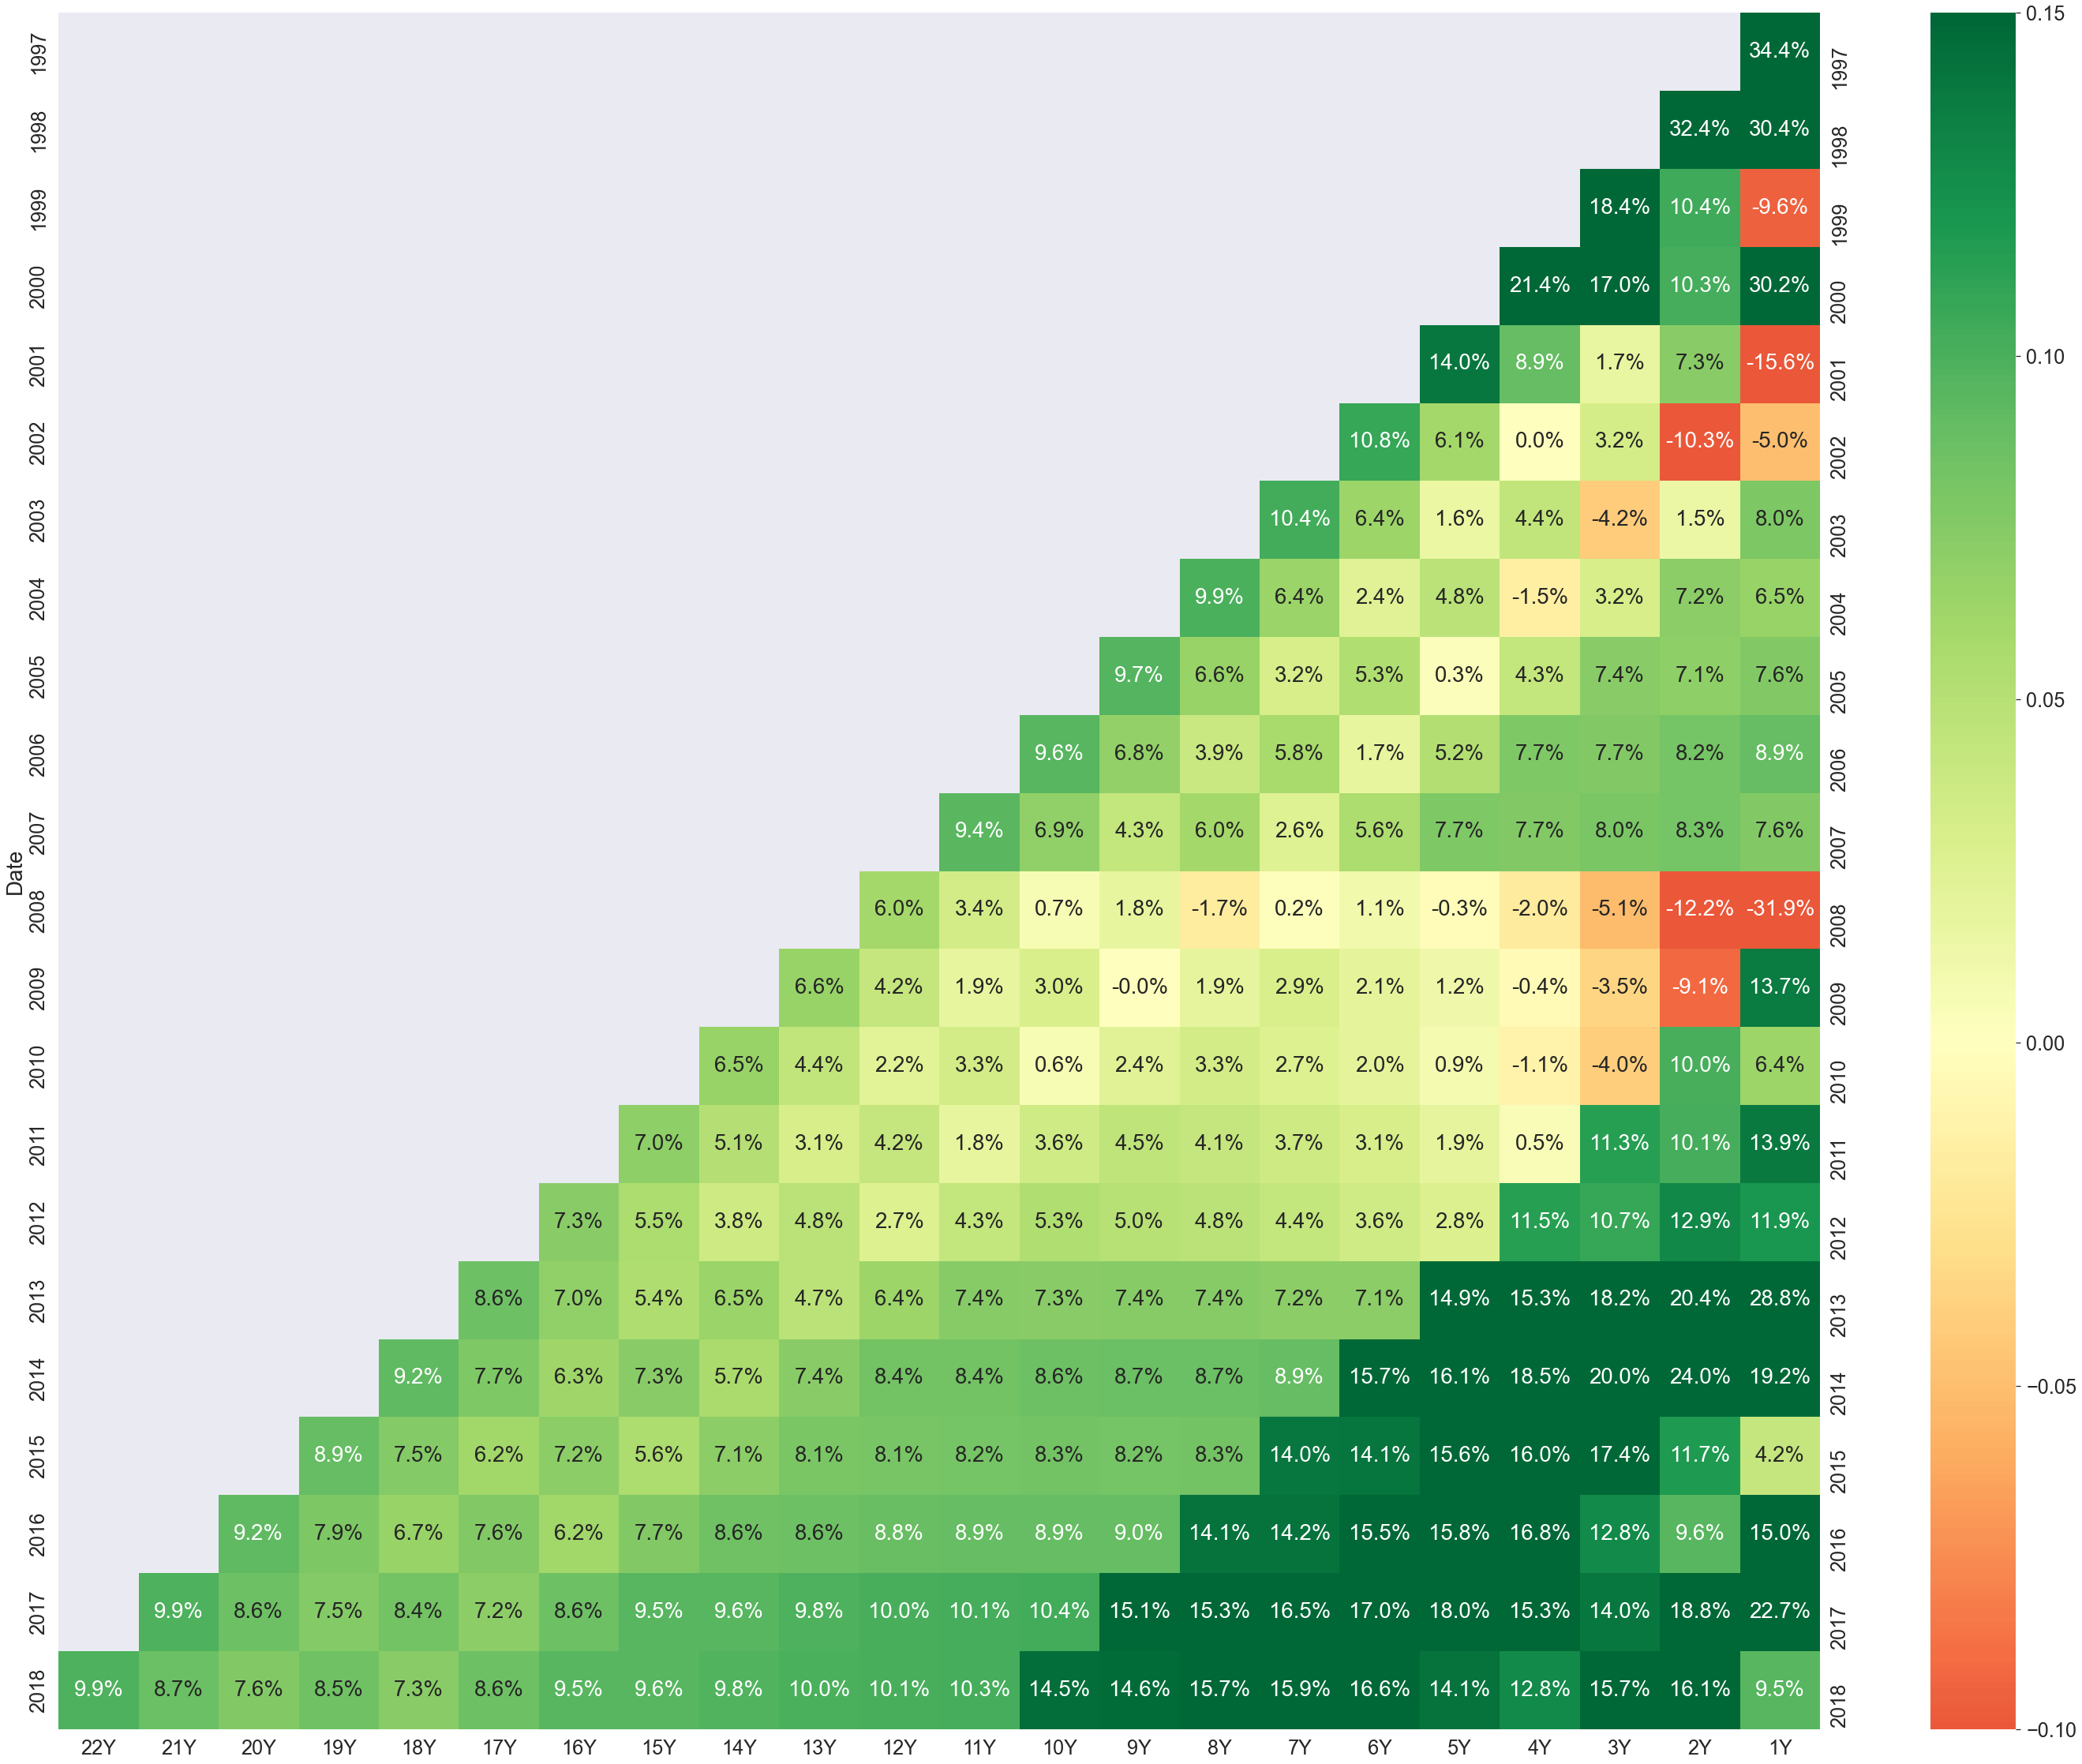

In [21]:
plt.figure(figsize=(50,40))
sns.set(font_scale=2.3)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

The above Return Triangle gives a clear visual of how the rolling returns changed over time.

### Comparing Mary's Portfolio with other sectors' recent performances

Once I have analyzed and educated Mary on the past Performance of her Portfolio, I will compare her Portfolio with similar designed Portfolios/Indexes of other Sectors (five largest companies) from the already prepared appropriate indexes for other sectors.

In [22]:
indexes = pd.read_csv("sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")
indexes["Health_Care"] = hea_index
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care[0]).mul(100)
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [23]:
indexes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2014-12-31 to 2018-12-28
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Basic Industries       1006 non-null   float64
 1   Capital Goods          1006 non-null   float64
 2   Consumer Durables      1006 non-null   float64
 3   Consumer Non-Durables  1006 non-null   float64
 4   Consumer Services      1006 non-null   float64
 5   Energy                 1006 non-null   float64
 6   Finance                1006 non-null   float64
 7   Public Utilities       1006 non-null   float64
 8   Technology             1006 non-null   float64
 9   Transportation         1006 non-null   float64
 10  Health_Care            1006 non-null   float64
dtypes: float64(11)
memory usage: 94.3 KB


In [24]:
indexes.iplot(title="HealthCare vs other sectors", xTitle="Date")

### Comparing annualized Risk, Return and Sharpe Ratio with other indexes

In [25]:
ret = indexes.pct_change().dropna()

In [26]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [27]:
summary = ann_risk_return(ret)
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


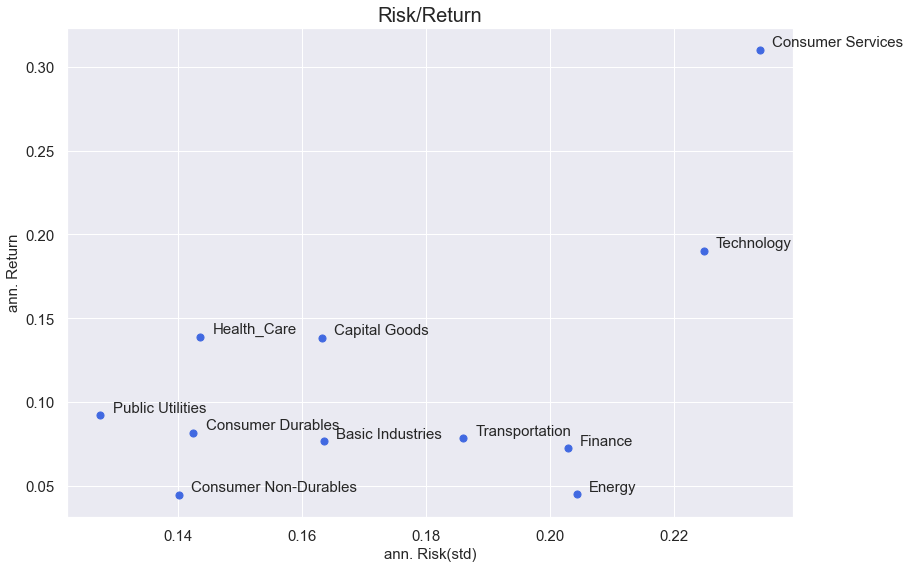

In [28]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, c = "royalblue", fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

Assuming a risk-free Return of 1.3% p.a. :

In [29]:
rf = [0.013, 0]
rf

[0.013, 0]

In [30]:
summary["Sharpe"] = (summary.Return - rf[0]) / summary.Risk
summary.sort_values("Sharpe", ascending = False)

,Return,Risk,Sharpe
Consumer Services,0.310,0.234,1.271
Health_Care,0.139,0.144,0.879
Technology,0.190,0.225,0.789
Capital Goods,0.138,0.163,0.768
Public Utilities,0.092,0.127,0.621
Consumer Durables,0.082,0.142,0.483
Basic Industries,0.077,0.163,0.390
Transportation,0.079,0.186,0.353
Finance,0.073,0.203,0.294
Consumer Non-Durables,0.045,0.140,0.229


The Large-Cap Health Sector showed the second highest Sharpe Ratio!<br><br>
The results might prompt Mary to stick with her original portfolio, but this is clearly not the safest option as<br>**"Past performance is no guarantee of future results"**.<br><br>
Therefore, in order to prove my point I will try to show her the value of *Diversification*.

### The importance of Portfolio Diversification

In order to convey the Portfolio Diversification Effect, I will simulate 50,000 random Portfolios and show the best Portfolio as well as a visual summary of the analysis. 

In [31]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [32]:
noa = len(ret.columns)
noa

11

In [33]:
nop = 50000

In [34]:
np.random.seed(111)
matrix = np.random.random(nop * noa).reshape(nop, noa)

In [35]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [36]:
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

Assigning the random weights to the returns of different sectors with 50000 combinations and calculating the overall Portfolio return:

In [37]:
port_ret = ret.dot(weights.T)

In [38]:
port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.002,...,-0.001,-0.001,-0.003,-0.003,-0.001,-0.002,-0.000,-0.002,-0.002,-0.003
2015-01-05,-0.014,-0.018,-0.017,-0.018,-0.020,-0.023,-0.019,-0.019,-0.022,-0.021,...,-0.020,-0.018,-0.016,-0.018,-0.018,-0.021,-0.018,-0.020,-0.018,-0.019
2015-01-06,-0.003,-0.008,-0.009,-0.008,-0.006,-0.010,-0.006,-0.011,-0.012,-0.010,...,-0.010,-0.006,-0.008,-0.006,-0.008,-0.008,-0.011,-0.011,-0.007,-0.006
2015-01-07,0.012,0.009,0.011,0.012,0.011,0.009,0.011,0.011,0.009,0.009,...,0.009,0.011,0.010,0.012,0.012,0.009,0.008,0.010,0.010,0.009
2015-01-08,0.018,0.018,0.017,0.018,0.015,0.020,0.017,0.019,0.017,0.016,...,0.016,0.018,0.017,0.016,0.019,0.016,0.015,0.017,0.017,0.016


In [39]:
port_summary = ann_risk_return(port_ret)

In [40]:
port_summary.head()

,Return,Risk
0,0.110,0.122
1,0.115,0.133
2,0.119,0.133
3,0.121,0.133
4,0.119,0.132


Now, I will try to show how the randomized portfolios' returns and risks compare to the actual sectors' indexes:

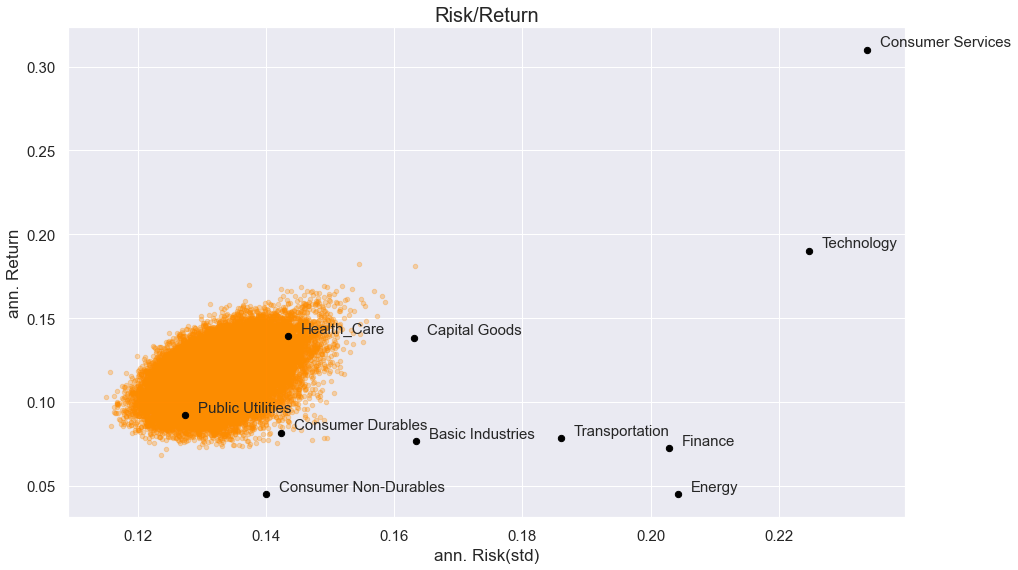

In [41]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, alpha = 0.3,color = "darkorange")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 40, color = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 17)
plt.ylabel("ann. Return", fontsize = 17)
plt.title("Risk/Return", fontsize = 20)
plt.tick_params(axis="both", labelsize = 15)
plt.show()

In [42]:
port_summary["Sharpe"] = (port_summary.Return - rf[0]) / port_summary.Risk

In [43]:
port_summary.head()

,Return,Risk,Sharpe
0,0.110,0.122,0.798
1,0.115,0.133,0.769
2,0.119,0.133,0.794
3,0.121,0.133,0.811
4,0.119,0.132,0.800


In [44]:
port_summary.describe()

,Return,Risk,Sharpe
count,50000.000,50000.000,50000.000
mean,0.115,0.132,0.774
std,0.014,0.005,0.092
min,0.068,0.115,0.440
25%,0.106,0.129,0.710
50%,0.115,0.132,0.777
75%,0.125,0.136,0.840
max,0.182,0.163,1.142


I will now try to find the particular random portfolio that has the highest Sharpe Ratio,<br>And then using its weights to calculate the Risk and Return:

In [45]:
msrp = port_summary.Sharpe.idxmax()

In [46]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.170
Risk     0.137
Sharpe   1.142
Name: 46957, dtype: float64

The above results shows the Risk and Return of the portfolio with the highest Sharpe Ratio from the randomized portfolios.

In [47]:
# Original Sector Indexes
summary

,Return,Risk,Sharpe
Basic Industries,0.077,0.163,0.390
Capital Goods,0.138,0.163,0.768
Consumer Durables,0.082,0.142,0.483
Consumer Non-Durables,0.045,0.140,0.229
Consumer Services,0.310,0.234,1.271
Energy,0.045,0.204,0.158
Finance,0.073,0.203,0.294
Public Utilities,0.092,0.127,0.621
Technology,0.190,0.225,0.789
Transportation,0.079,0.186,0.353


Compared to most of the original sector indexes and Mary's portfolio, the randomized portfolio performs better.<br>It has:
* Higher returns
* Lower risks
* Higher Sharpe Ratio

In [48]:
msrp_w = weights[msrp, :]

Below are the weights for the respective sectors to invest in that could yield the highest Sharpe Ratio:

In [49]:
pd.Series(index = indexes.columns, data = msrp_w)

Basic Industries        0.130
Capital Goods           0.044
Consumer Durables       0.092
Consumer Non-Durables   0.005
Consumer Services       0.286
Energy                  0.004
Finance                 0.010
Public Utilities        0.105
Technology              0.055
Transportation          0.018
Health_Care             0.250
dtype: float64

In order to make the argument more convincing, I will try to only include the sectors to her Stock Portfolio that
* Showed a __positive Alpha__ over the most recent 4-Year Period
* Have a __Beta-Factor below 1__ (non-cyclical / defensive) in case of a Market Turmoil in the near Future. 

### Identifying Sectors with positive Alpha and a Beta-Factor < 1

I will be using the S&P 500 Total Return Index as Market Portfolio to understand the general market trend.<br>Consequently, I will be calculating the following Metrics for the Sector Indexes and the Market Portfolio:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [50]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [51]:
SP500 = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]
SP500 = SP500.reindex(indexes.index)

In [52]:
ret_SP = SP500.pct_change().dropna()
ret_SP.head()

Date
2015-01-02   -0.000
2015-01-05   -0.018
2015-01-06   -0.009
2015-01-07    0.012
2015-01-08    0.018
Name: Close, dtype: float64

In [53]:
ret["SP500"] = ret_SP
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018


In [54]:
summary = ann_risk_return(ret)
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [55]:
summary

,Return,Risk,Sharpe,TotalRisk_var
Basic Industries,0.077,0.163,0.390,0.027
Capital Goods,0.138,0.163,0.768,0.027
Consumer Durables,0.082,0.142,0.483,0.020
Consumer Non-Durables,0.045,0.140,0.229,0.020
Consumer Services,0.310,0.234,1.271,0.055
Energy,0.045,0.204,0.158,0.042
Finance,0.073,0.203,0.294,0.041
Public Utilities,0.092,0.127,0.621,0.016
Technology,0.190,0.225,0.789,0.050
Transportation,0.079,0.186,0.353,0.035


Now, for calculating the systematic risk, I will calculate the covariance of the returns.

In [56]:
COV = ret.cov()*252

In [57]:
summary["SystRisk_var"] = COV.iloc[:, -1]

Further, I am calculating the other parameters.

In [58]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [59]:
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

In [60]:
summary["capm_ret"] = rf[0] + (summary.loc["SP500", "Return"] - rf[0]) * summary.beta

In [61]:
summary["alpha"] = summary.Return - summary.capm_ret

In [62]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


Now that we have all the required parameters, we are ready to narrow it down to the best 4 sectors with the needed requirements to recommend to Mary.

They are the following:

In [63]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Health_Care,0.139,0.144,0.879,0.021,0.016,0.005,0.835,0.067,0.073


Therefore, I will add the Sectors **Basic Industries, Consumer Durables and Public Utilities** to Mary´s Health Care Portfolio.